In [ ]:
import pandas as pd
import os

In [ ]:
#names = ['Mean_Raw_HR']


#read in csv file and print 1st 10 and last 10 rows
df = pd.read_csv(

    "/content/Minute_level_Data.csv",
    dtype={'user_id': int}


)

unique_count = df['P_ID'].nunique()

print("Number of unique strings in 'P_ID' column:", unique_count)


df.sort_values(['P_ID', 'Day_Num', 'Trips'], inplace=True)

# Print the reorganized dataframe
print(df.head)

df.to_csv('COLABTRANSFORMER.csv', index=False)


<ipython-input-3-803ce308193d>:5: DtypeWarning: Columns (71,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Number of unique strings in 'P_ID' column: 60
<bound method NDFrame.head of        P_ID Day_Num  Trip_Time  Trips  Weather_Info  Mean_Raw_HR  \
43     P100    Day1    Morning  Trip1             1    99.166667   
44     P100    Day1    Morning  Trip1             1   100.700000   
45     P100    Day1    Morning  Trip1             1    91.000000   
46     P100    Day1    Morning  Trip1             1    91.916667   
47     P100    Day1    Morning  Trip1             1    94.416667   
...     ...     ...        ...    ...           ...          ...   
16198   P99    Day7  Afternoon  Trip2             1    98.333333   
16199   P99    Day7  Afternoon  Trip2             1    96.000000   
16200   P99    Day7  Afternoon  Trip2             1    93.000000   
16201   P99    Day7  Afternoon  Trip2             1   100.916667   
16202   P99    Day7  Afternoon  Trip2             1   100.500000   

       Mean_NR_HR_SD  Mean_NR_HR_2SD  Mean_NR_HR_Global  Mean_Speed  ...  \
43         20.629217       36.2

In [ ]:

from sklearn.model_selection import train_test_split


# Get unique 'P_ID' values
unique_ids = df['P_ID'].unique()

# Split the unique 'P_ID' values into train and test groups
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=42)

print(train_ids)
print(test_ids)

# Filter the original DataFrame based on the train and test groups
train_df = df[df['P_ID'].isin(train_ids)]
#print(train_df)
test_df = df[df['P_ID'].isin(test_ids)]
#print(test_df)

# Extract the 'Mean_Raw_HR' values for train and test sets
hr_train = train_df['Mean_Raw_HR'].tolist()
print(hr_train)
hr_test = test_df['Mean_Raw_HR'].tolist()
print(hr_test)



print("Training set has {} observations".format(len(hr_train)))
print("Test set has {} observations".format(len(hr_test)))


['P36' 'P109' 'P88' 'P134' 'P120' 'P117' 'P54' 'P114' 'P65' 'P17' 'P42'
 'P98' 'P24' 'P96' 'P131' 'P29' 'P124' 'P35' 'P27' 'P133' 'P23' 'P95'
 'P126' 'P37' 'P89' 'P56' 'P47' 'P33' 'P67' 'P103' 'P19' 'P107' 'P82'
 'P52' 'P45' 'P22' 'P85' 'P125' 'P20' 'P15' 'P99' 'P18' 'P12' 'P62' 'P130'
 'P32' 'P87' 'P48']
['P100' 'P116' 'P46' 'P73' 'P129' 'P90' 'P39' 'P84' 'P127' 'P97' 'P78'
 'P86']
[106.583333333333, 106.416666666667, 105.416666666667, 103.25, 106.5, 109.666666666667, 107.833333333333, 107.166666666667, 105.75, 106.0, 106.833333333333, 105.083333333333, 112.8, 106.166666666667, 103.416666666667, 109.916666666667, 105.833333333333, 113.583333333333, 117.181818181818, 104.5, 114.333333333333, 109.666666666667, 103.75, 103.916666666667, 103.75, 106.666666666667, 119.333333333333, 106.833333333333, 124.166666666667, 114.333333333333, 112.333333333333, 116.75, 104.0, 110.6, 109.166666666667, 104.583333333333, 108.5, 139.833333333333, 104.25, 104.833333333333, 112.083333333333, 103.41666666

In [ ]:
import numpy as np


# pass in HR (obs) and sequence which is fragment of
# data to guess the last in the sequence
# After first (seq_size) the window will then slide over one so
#                      1->10 will become 2->11
# Always trying to predict last in sequence
def to_sequences(seq_size, obs):
    x=[]
    y=[]

    for i in range(len(obs)-seq_size):
        window = obs[i:(i+seq_size)]
        after_window = obs[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)
"""
def to_sequences(seq_size, obs, ids): #new updated function added ids param to
                                      #ensure no different P_IDs in prediction
    x = []
    y = []

    for i in range(len(obs) - seq_size):
        window = obs[i:(i+seq_size)]
        after_window = obs[i+seq_size]

        # Get the 'P_ID' values for the current window and after_window
        window_ids = ids[i:(i+seq_size)]
        after_window_id = ids[i+seq_size]

        # Check if all 'P_ID' values in the window are the same
        if len(set(window_ids)) == 1 and window_ids[0] == after_window_id:
            window = [[x] for x in window]
            x.append(window)
            y.append(after_window)

    return np.array(x), np.array(y)

"""
seq_size = 10 # going to change....

"""
# Use the updated to_sequences function
x_train, y_train = to_sequences(seq_size, hr_train, p_ids_train)
x_test, y_test = to_sequences(seq_size, hr_test, p_ids_test)
""" # P_IDS ????

x_train, y_train = to_sequences(seq_size, hr_train)
x_test, y_test = to_sequences(seq_size, hr_test)


# Will print the elements, seq size, window that were trying to predict
print("Shape of training set: {}".format(x_train.shape))
print("Shape of training set: {}".format(x_test.shape))

print(x_train.shape)

Shape of training set: (13632, 10, 1)
Shape of training set: (2572, 10, 1)
(13632, 10, 1)


In [ ]:
print(x_train.shape)

(13632, 10, 1)


In [ ]:
!conda update tensorflow

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/ahmadmohammad/opt/anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    curl-8.1.1                 |       h6c40b1e_0          84 KB
    cython-0.29.35             |   py38hcec6c5f_0         2.0 MB
    huggingface_hub-0.15.1     |   py38hecd8cb5_0         296 KB
    imageio-2.31.1             |   py38hecd8cb5_0         471 KB
    jupyter_server_terminals-0.4.4|   py38hecd8cb5_1          26 KB
    jupyter_server_ydoc-0.8.0  |   py38hecd8cb5_1          23 KB
    libcurl-8.1.1              |       ha585b31_0         359 KB
    libnghttp2-1.52.0          |       h1c88b7d_1         662 KB

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(x_test, y_test, verbose=1)

Epoch 1/20
171/171 [==============================] - 45s 201ms/step - loss: 768.0333 - val_loss: 44.9038
Epoch 2/20
171/171 [==============================] - 32s 189ms/step - loss: 522.7905 - val_loss: 45.6960
Epoch 3/20
171/171 [==============================] - 34s 196ms/step - loss: 367.7863 - val_loss: 44.0256
Epoch 4/20
171/171 [==============================] - 34s 197ms/step - loss: 286.5031 - val_loss: 45.0065
Epoch 5/20
171/171 [==============================] - 32s 189ms/step - loss: 249.4550 - val_loss: 43.6861
Epoch 6/20
171/171 [==============================] - 30s 173ms/step - loss: 217.4302 - val_loss: 42.5424
Epoch 7/20
171/171 [==============================] - 34s 196ms/step - loss: 194.4659 - val_loss: 44.9413
Epoch 8/20
171/171 [==============================] - 31s 180ms/step - loss: 185.0777 - val_loss: 39.0258
Epoch 9/20
171/171 [==============================] - 31s 181ms/step - loss: 174.5855 - val_loss: 37.0875
Epoch 10/20
171/171 [=========================

41.896514892578125

In [ ]:
# means +- 6.8ish HR

# Got 6.4 RMSE by adding speed to train set

"""
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))
"""
import pandas as pd
from sklearn import metrics

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))

# Reshape the pred array to match the shape of y_test
pred = pred.reshape(-1, 1)

# Create a DataFrame to display predictions and actual values side by side
predictions_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

print("Predictions and Actual Values:")
print(predictions_df)

# Reset pandas options to default
pd.reset_option('display.max_rows')

print("Score (RMSE): {}".format(score))


81/81 [==============================] - 3s 35ms/step
Predictions and Actual Values:
          Actual   Predicted
0     103.333333   93.978188
1      83.333333   93.578690
2      90.461538   92.514496
3      86.000000   90.374245
4      93.083333   89.618393
5      99.545455   88.196747
6      86.583333   90.654800
7      86.833333   90.248260
8      93.000000   86.309601
9      84.692308   91.018951
10     97.750000   86.737282
11     99.454545   88.535919
12     91.909091   90.318451
13     93.090909   88.407654
14     90.833333   91.583939
15     90.153846   90.618942
16     88.000000   88.862129
17     88.333333   89.825836
18     96.307692   86.949944
19     93.636364   88.978546
20     96.692308   90.466766
21    109.090909   89.859184
22     91.384615   94.109215
23    105.000000   92.784569
24     87.846154   94.296585
25    100.583333   94.633163
26    100.750000   92.462502
27     91.833333   96.893875
28     92.166667   92.914391
29     90.363636   91.602104
30     88.583333

81/81 [==============================] - 4s 52ms/step


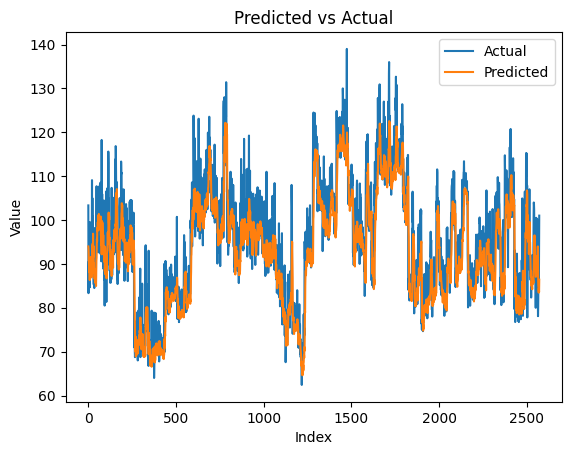

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred, y_test))

# Reshape the pred array to match the shape of y_test
pred = pred.reshape(-1, 1)

# Create a DataFrame to display predictions and actual values side by side
predictions_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})

# Plot the line graph
plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual')
plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()


In [ ]:
#MAE, MSE,
#Evaluation Parameters
# Careful Cross Validation Makes sure no overfitting

#More Plots on how training is done and more explanation


mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, pred)

print("Mean Absolute Error (MAE): {}".format(mae))
print("Mean Squared Error (MSE): {}".format(mse))
print("Root Mean Squared Error (RMSE): {}".format(rmse))
print("R-squared (R2) Score: {}".format(r2_score))

Mean Absolute Error (MAE): 4.765802422362181
Mean Squared Error (MSE): 41.896520611780474
Root Mean Squared Error (RMSE): 6.472752166720156
R-squared (R2) Score: 0.7555770083423353
